In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("user_behavior_dataset.csv")
data.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_5923/3013490935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Device Model"],width=0.5,palette='Set1')


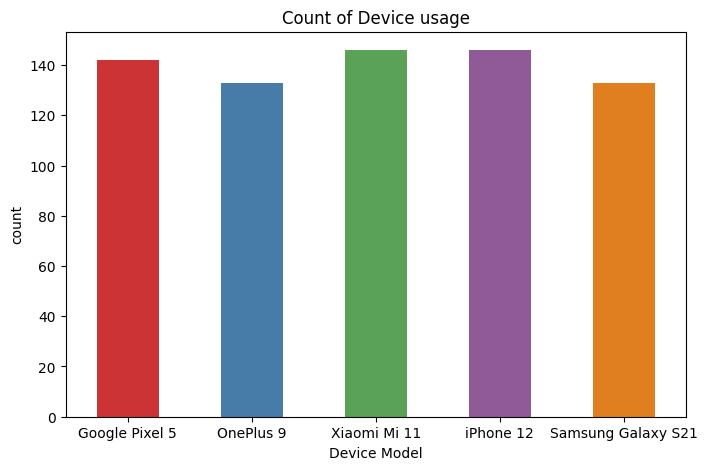

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(x=data["Device Model"],width=0.5,palette='Set1')
plt.title("Count of Device usage")
plt.show()

In [52]:
mean_screen_time=data.groupby("Device Model")["Screen On Time (hours/day)"].mean().reset_index()

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_5923/35363855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Device Model"],y=data["Screen On Time (hours/day)"],data=mean_screen_time,palette="deep")


Text(0.5, 1.0, 'Average Screen time spend as per Devices')

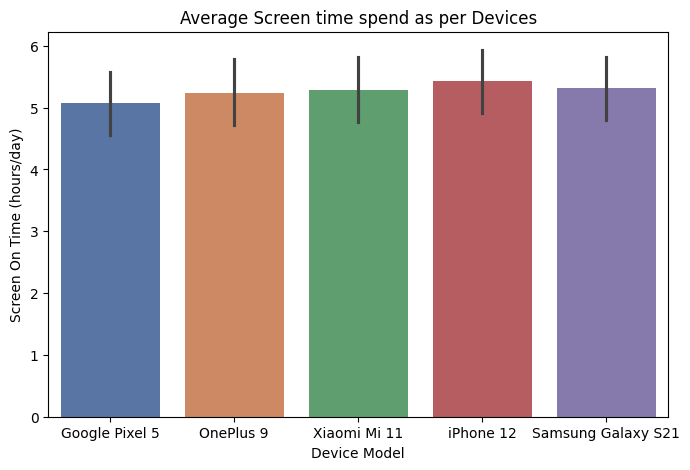

In [53]:
plt.figure(figsize=(8,5))
sns.barplot(x=data["Device Model"],y=data["Screen On Time (hours/day)"],data=mean_screen_time,palette="deep")
plt.title("Average Screen time spend as per Devices")

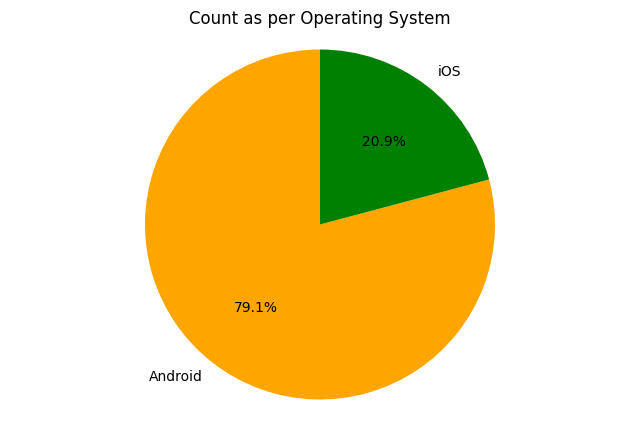

In [54]:
os_count = data['Operating System'].value_counts()
colors = ["orange", "green", "blue"] 
plt.figure(figsize=(8, 5))
plt.pie(os_count, labels=os_count.index, colors=colors[:len(os_count)], autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.title("Count as per Operating System")
plt.show()

<Axes: >

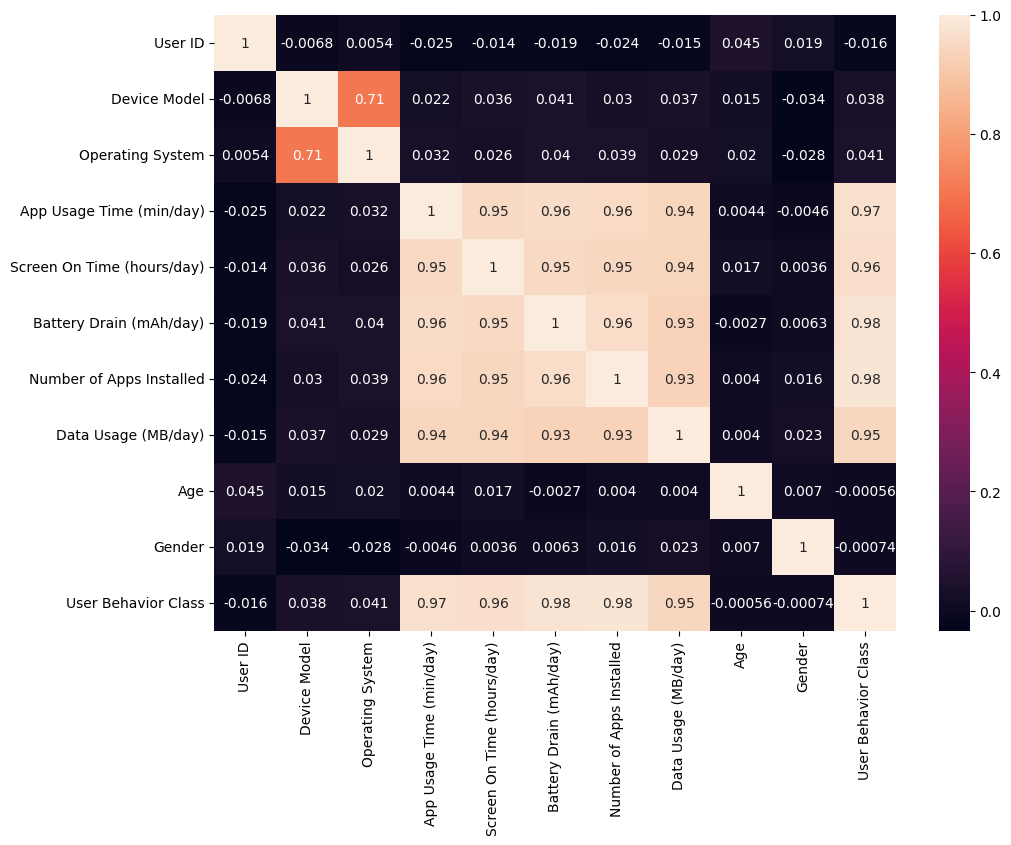

In [67]:
plt.figure(figsize=(11,8))
sns.heatmap(data.corr(),annot=True)

In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Device Model"]=le.fit_transform(data["Device Model"])
data["Operating System"]=le.fit_transform(data["Operating System"])
data["Gender"]=le.fit_transform(data["Gender"])

In [69]:
x=data.drop(["User ID","User Behavior Class"],axis=1)
y=data["User Behavior Class"]

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [72]:
classifiers={
    "Logistic Regression ":LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier ":RandomForestClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Naive Bayes Classifier":GaussianNB()
}

In [89]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [90]:

for name,clf in classifiers.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{name}:")
    print(f"{accuracy}:")
    print(classification_report(y_test,y_pred))
    print("-"*60)

Logistic Regression :
0.6571428571428571:
              precision    recall  f1-score   support

           1       0.95      0.67      0.78        27
           2       0.54      0.76      0.63        29
           3       0.61      0.50      0.55        34
           4       0.58      0.67      0.62        27
           5       0.81      0.74      0.77        23

    accuracy                           0.66       140
   macro avg       0.70      0.67      0.67       140
weighted avg       0.69      0.66      0.66       140

------------------------------------------------------------
Decision Tree Classifier:
0.9928571428571429:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       0.96      1.00      0.98        27
           5       1.00      0.96      0.98        23

    accuracy                        

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-def

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


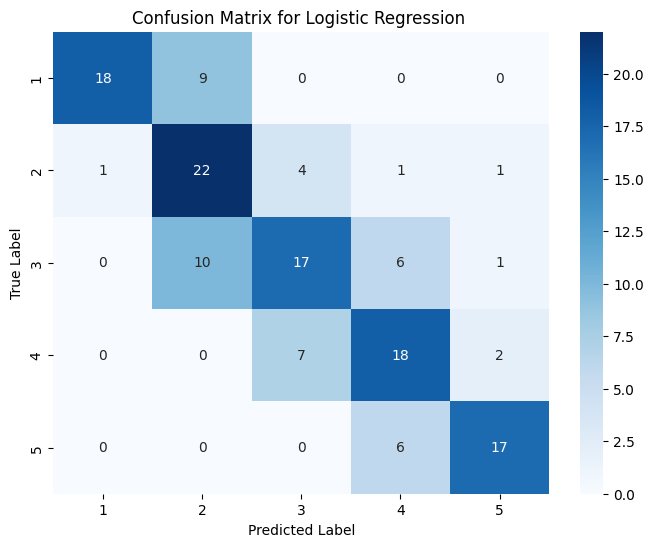

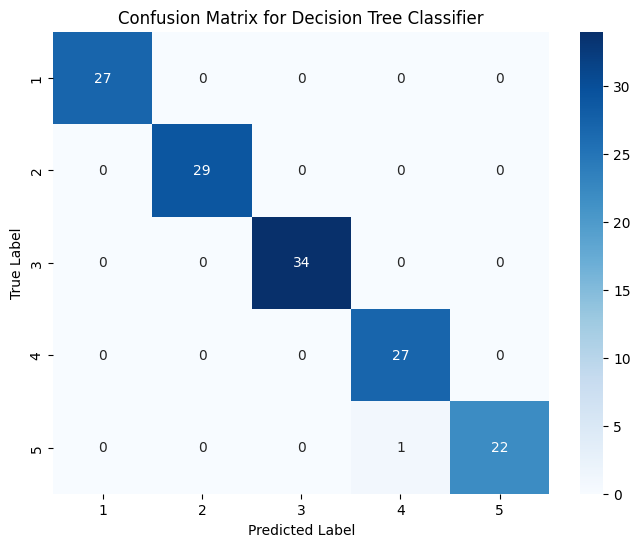

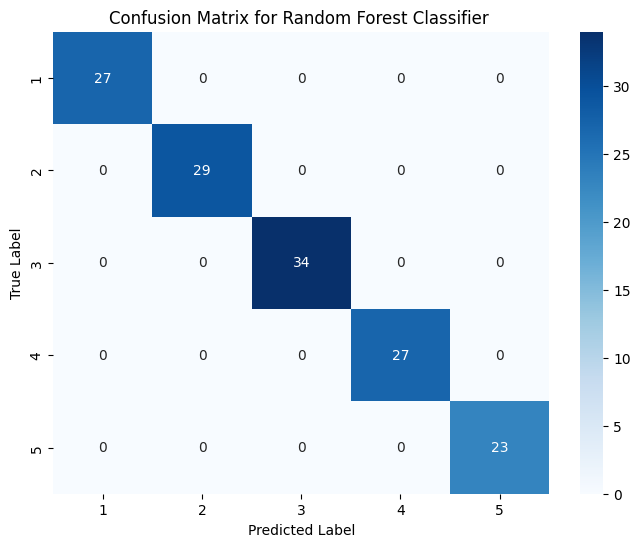

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


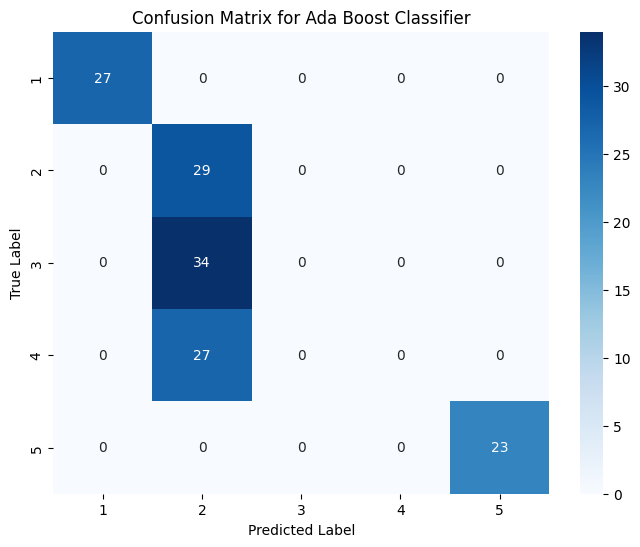

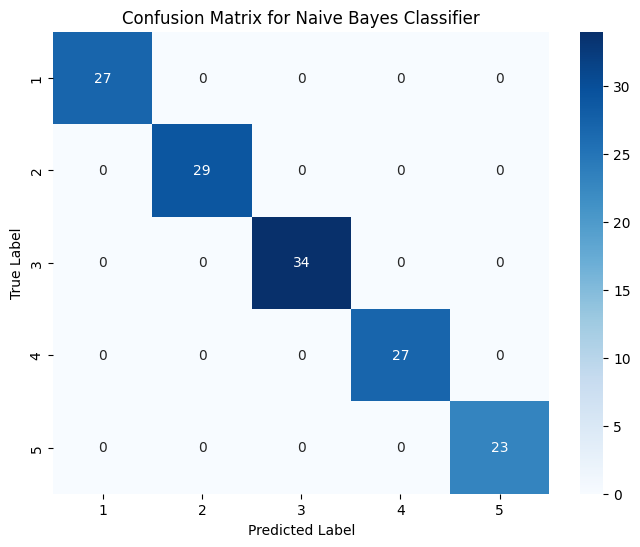

In [91]:
accuracy_results={}
for name,clf in classifiers.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_results[name]=accuracy
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [92]:
accuracy_df = pd.DataFrame(accuracy_results.items(), columns=['Classifier', 'Accuracy'])

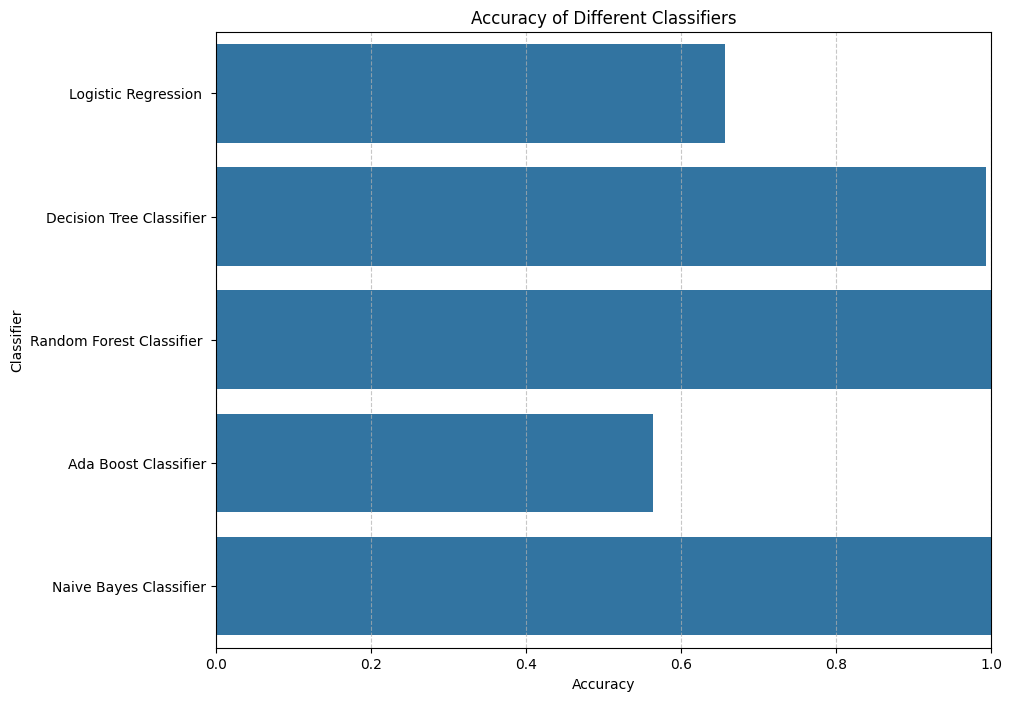

In [93]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Accuracy", y="Classifier", data=accuracy_df)
plt.title("Accuracy of Different Classifiers")
plt.xlabel("Accuracy")
plt.ylabel("Classifier")
plt.xlim(0, 1) 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()